# 가격과 환율 환산 가격

## 질문
* 해외 금융상품의 가격은 달러로 표시된다. 
* 원/달러 환율은 매일 매일 달라진다. 
* 환율을 적용한 원화 가격을 얻으려면?

## Key Point
* 두 개의 DataFrame의 컬럼을 한번에 더할 수 있다.
* 이때, 인덱스로 매칭 된다.

# 애플(AAPL) 주가

In [1]:
%matplotlib inline

from pandas_datareader import data
import datetime

# 기간 2016년 1Q
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 3, 30)

In [2]:
df = data.DataReader("AAPL", 'yahoo', start, end)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,104.781429
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,102.155677
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,100.156523
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,95.929460
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,96.436710


# 원/달러 환율

In [3]:
df_kous = data.DataReader("DEXKOUS", 'fred', start, end)
df_kous.head(10)

,DEXKOUS
DATE,
2016-01-01,NaN
2016-01-04,1191.46
2016-01-05,1190.43
2016-01-06,1200.16
2016-01-07,1193.05
2016-01-08,1206.97
2016-01-11,1206.55
2016-01-12,1208.95
2016-01-13,1208.95


# 원화 환산 가격 컬럼

In [4]:
df['Price Won'] = df['Adj Close'] * df_kous['DEXKOUS']
df.head()

,Open,High,Low,Close,Volume,Adj Close,Price Won
Date,,,,,,,
2016-01-04,102.610001,105.370003,102.000000,105.349998,67649400,104.781429,124842.881396
2016-01-05,105.750000,105.849998,102.410004,102.709999,55791000,102.155677,121609.182571
2016-01-06,100.559998,102.370003,99.870003,100.699997,68457400,100.156523,120203.852644
2016-01-07,98.680000,100.129997,96.430000,96.449997,81094400,95.929460,114448.642253
2016-01-08,98.550003,99.110001,96.760002,96.959999,70798000,96.436710,116396.215869


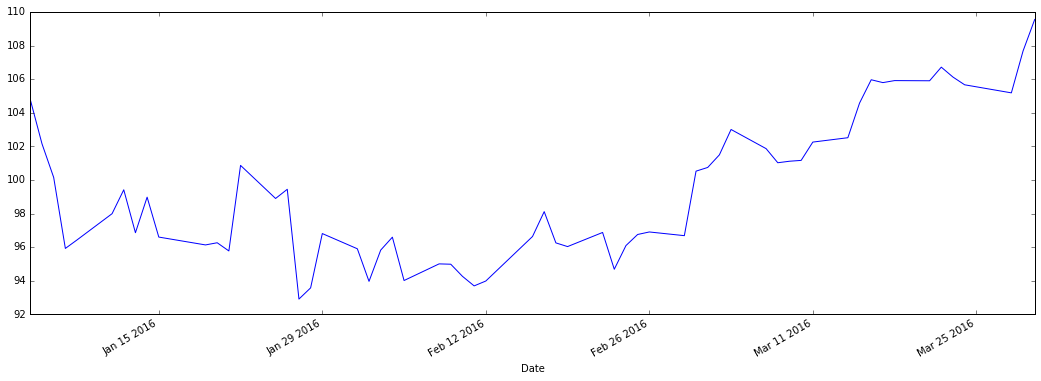

In [5]:
# 종가(달러) 차트
df['Adj Close'].plot(figsize=(18,6))

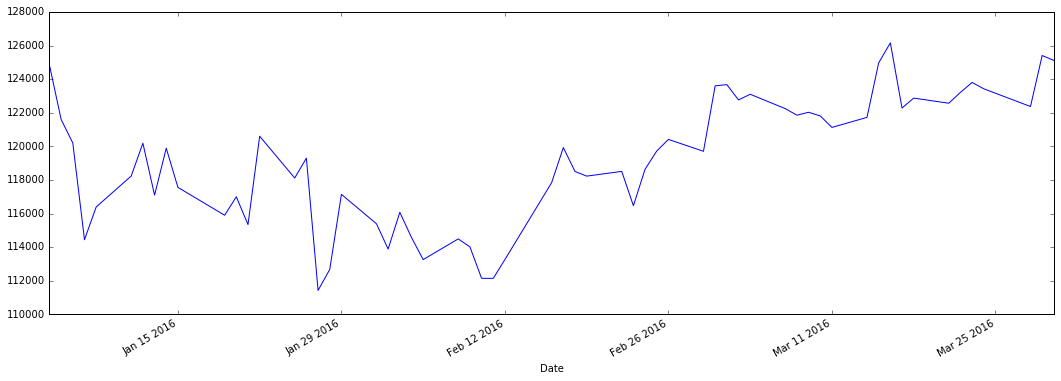

In [6]:
# 종가(원화) 차트

df['Price Won'].plot(figsize=(18,6))

# 서로 다른 가격의 비교

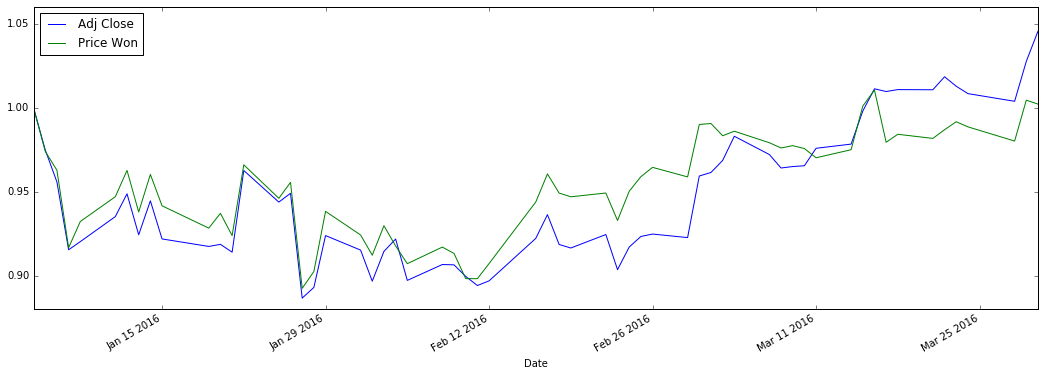

In [7]:
# 두 컬럼만 추출, 모든 row를 첫번째 row로 나눔 
# (Normalize, 초기 가격 대비 두개의 가격이 어떻게 달라지고 있는지를 보기 위함)

df_plot = df[['Adj Close', 'Price Won']]
df_plot = df_plot / df_plot.ix[0]
df_plot.plot(figsize=(18,6))

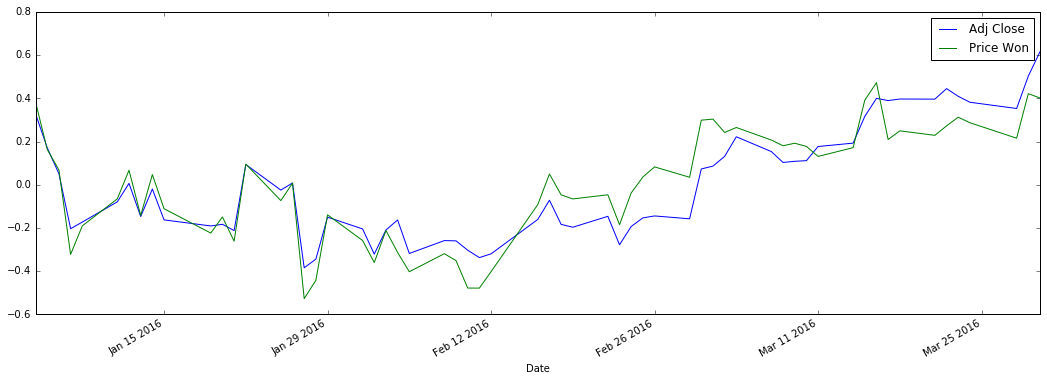

In [9]:
# 두 컬럼만 추출, 모든 row를 각 row의 range로 나눔
# (Normalize, 각 row의 변화폭을 보기 위함)

df_plot = df[['Adj Close', 'Price Won']]
df_plot = (df_plot - df_plot.mean()) / (df_plot.max() - df_plot.min())
df_plot.plot(figsize=(18,6))